<a href="https://colab.research.google.com/github/matanshu/TwitterSemtimentAanalysis/blob/main/Project_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic packages
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
import nltk
import string
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
import operator
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.util import ngrams
from sklearn import metrics, model_selection
from sklearn.linear_model import Perceptron, LogisticRegression
import numpy
numpy.random.seed(3)

# Packages for data preparation
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [ ]:
# Task 1.a downloading datasets
# downloading packages
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
data_path = "/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv"

# loading dataset
data = pd.read_csv(data_path, encoding='ISO-8859-1', header=None, 
                   skiprows=750000, usecols=[0, 5], names=['label', 'tweet'], nrows=100000)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,tweet
0,0,"@Opotopo small slip on Tryfan few weeks back, ..."
1,0,@Idristwilight You can post HAN when you want....
2,0,@rose_7 Ohh poor jan please tell her that if ...
3,0,Finally home from work...It was a looong day!!...
4,0,im very sad 4 chantelle and tom
...,...,...
99995,4,Now need 8 followers to compleate 1000 Follow...
99996,4,I knew I had to explain something to my friend...
99997,4,done tweeting..... til tomorrow..
99998,4,@cmozilo Act II set is pretty breath-taking -L...


In [ ]:
# removing duplicates from data
data = data.drop_duplicates()
data

,label,tweet
0,0,"@Opotopo small slip on Tryfan few weeks back, ..."
1,0,@Idristwilight You can post HAN when you want....
2,0,@rose_7 Ohh poor jan please tell her that if ...
3,0,Finally home from work...It was a looong day!!...
4,0,im very sad 4 chantelle and tom
...,...,...
99995,4,Now need 8 followers to compleate 1000 Follow...
99996,4,I knew I had to explain something to my friend...
99997,4,done tweeting..... til tomorrow..
99998,4,@cmozilo Act II set is pretty breath-taking -L...


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
# define variables
punctuation = list(string.punctuation)
exclude = set(string.punctuation)
stop = stopwords.words('english') + ['amp','ufe','ude','udc','u201d','ud835','ud83c','u2019s','ud83d','u2019t','u2019m','u2019s','u20b918','u201ci','would', 'could', 'u', 'dont', 'im', 'can\'t', 'i\'m', 'cant', 
                                     'i\'ve', 'i\'ll', 'ur','rt','via','the ',u'\u2026',u'xe9',u'de','display_text_range','display_text_range\'[]','u2026','The',':\\','http','https','co','n','udd']
lemma = WordNetLemmatizer()
ps = nltk.PorterStemmer()
emoticons_str = r"""(?:
        [:=;] 
        [oO\-]?
        [D\)\]\(\]/\\OpP]
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

emoticons = {
    ":-(": "sad", ":(": "sad", ":-|": "sad",
    ";-(": "sad", ";-<": "sad", "|-{": "sad",
    ":-)": "happy", ":)": "happy", ":o)": "happy",
    ":-}": "happy", ";-}": "happy", ":->": "happy",
    ";-)": "happy", "3>": "love", ":]": 'happy', ":-]": 'happy',
    ":[": 'sad', ":-[": 'sad', 'lt3': 'love', '<3': 'love', 'lt 3': 'love'
}

tokens_re = re.compile(r'(' + '|'.join(regex_str) + ')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# preprcessing functions with consideration of twitter symbols and pattern

# tokenizing the tweets
def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

# function for cleanning tweet by removing stopwords snd puncuations, 
# replacing smileys symbols by words and and lemmatization
def clean(doc):
    tokens = preprocess(doc, lowercase=True)
    stop_free = [i for i in tokens if i not in stop]
    punc_free = [i for i in stop_free if i not in exclude]
    one_char_free = [i for i in punc_free if len(i)!=1]
    replace_smileys = [emoticons.get(i, i) for i in one_char_free]
    normalized = " ".join(lemma.lemmatize(word) for word in replace_smileys)
    return normalized

In [ ]:
# Tasks 1.b and 1.c: text preprocessing and data exploration
# preparing data frames (unigrams, bigrams and non split text) 
doc_clean = [clean(doc) for doc in data['tweet']]
unigrams_doc_clean = [doc.split() for doc in doc_clean]
bigrams_doc_clean = [list(ngrams(doc, 2)) for doc in unigrams_doc_clean]
data_unigrams = pd.DataFrame()
data_bigrams = pd.DataFrame()
data['tweet'] = doc_clean
data_unigrams['tweet'] = unigrams_doc_clean
data_unigrams['label'] = data['label']
data_bigrams['tweet'] = bigrams_doc_clean
data_bigrams['label'] = data['label']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# number of docs from each category
positives_unigram_reviews = data_unigrams[data_unigrams['label'] == 4]['tweet']
negatives_unigram_reviews = data_unigrams[data_unigrams['label'] == 0]['tweet']
num_positives = positives_unigram_reviews.count()
num_negatives = len(data_unigrams) - num_positives
positives_bigram_reviews = data_bigrams[data_bigrams['label'] == 4]['tweet']
negative_bigram_reviews = data_bigrams[data_bigrams['label'] == 0]['tweet']
print('total positivie reviews: ', num_positives)
print('total negative reviews: ', num_negatives)

total positivie reviews:  49323
total negative reviews:  50188


In [ ]:
# function for calculcating terms (uni-grams, bi-grams) distribution per category 
def distribution_terms_category(category_reviews, slice_number):
    dict_kind_term_amount = {}
    for review in category_reviews:
        for term in review:
            if term in dict_kind_term_amount.keys():
                dict_kind_term_amount[term] = dict_kind_term_amount[term] + 1
            else:
                dict_kind_term_amount[term] = 1
    distribution = pd.DataFrame()
    partial_distribution = dict(itertools.islice(dict_kind_term_amount.items(), 0, slice_number))
    sorted_distribution = dict(sorted(partial_distribution.items(), key=operator.itemgetter(1), reverse=True))
    distribution['term'] = sorted_distribution.keys()
    distribution['amount'] = sorted_distribution.values()
    return list(itertools.islice(sorted_distribution.keys(), 0, 10)), distribution, sorted_distribution


In [ ]:
# table which present the top 10 terms per category 
bigram_positive_term_amount, bigram_positive_distribution, dic_bigram_positive = distribution_terms_category(positives_bigram_reviews, 4000)
bigram_negative_term_amount, bigram_negative_distribution, dic_bigram_negative = distribution_terms_category(negative_bigram_reviews, 4000)
unigram_positive_term_amount, unigram_positive_distribution, dic_unigram_positive = distribution_terms_category(positives_unigram_reviews, 10000)
unigram_negatives_term_amount, unigram_negative_distribution, dic_unigram_negative = distribution_terms_category(negatives_unigram_reviews, 10000)
table = pd.DataFrame()
table['positive unigram'] = unigram_positive_term_amount
table['negative unigram'] = unigram_negatives_term_amount
table['positive bigram'] = bigram_positive_term_amount
table['negative bigram'] = bigram_negative_term_amount
table

,positive unigram,negative unigram,positive bigram,negative bigram
0,good,day,"(good, morning)","(jon, kate)"
1,day,go,"(last, night)","(last, night)"
2,love,get,"(looking, forward)","(feel, like)"
3,quot,work,"(good, night)","(want, go)"
4,like,like,"(good, luck)","(look, like)"
5,get,today,"(getting, ready)","(wanna, go)"
6,time,sad,"(good, day)","(go, back)"
7,thanks,miss,"(sound, like)","(last, day)"
8,going,want,"(look, like)","(sorry, hear)"
9,lol,going,"(let, know)","(really, want)"


In [ ]:
# function for plotting the most common 25 words
def plot_graph(sentiment, ngram, distribution):
    plt.figure(figsize=(8, 4))
    plt.title('Top 25 most ' + sentiment + ' ' + ngram + ' common words')
    plt.xticks(fontsize=10, rotation=90)
    fd = nltk.FreqDist(distribution)
    fd.plot(25, cumulative=False)

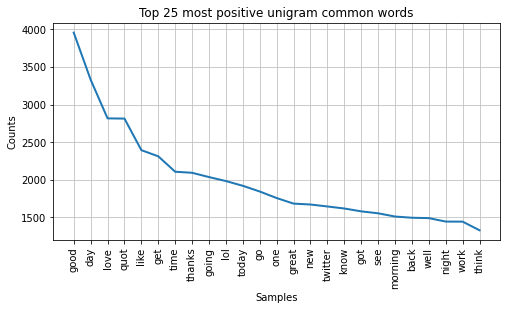

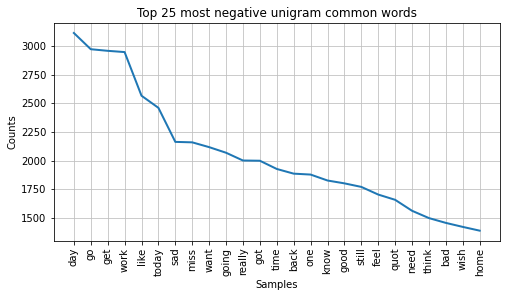

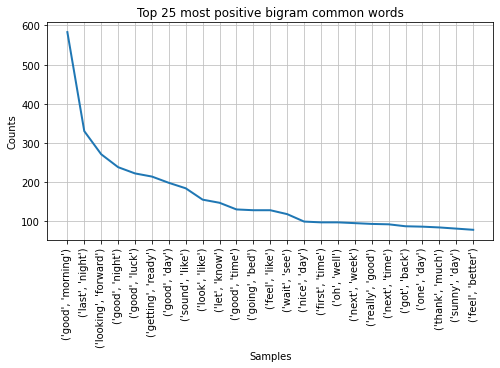

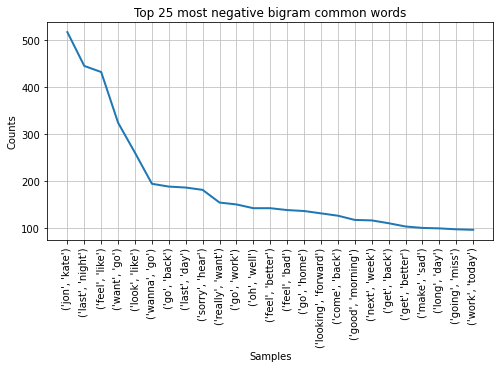

In [ ]:
plot_graph('positive', 'unigram', dic_unigram_positive)
plot_graph('negative', 'unigram', dic_unigram_negative)
plot_graph('positive', 'bigram', dic_bigram_positive)
plot_graph('negative', 'bigram', dic_bigram_negative)

In [ ]:
# function for showing histogram for class distribution
def hist_plot(df_distribution, title, bins):
    df_distribution['normalized'] = df_distribution["amount"].apply(np.log10)
    df_distribution.hist(column='normalized', edgecolor='black', bins=bins)
    plt.style.use('fivethirtyeight')
    color = '#fc4f30'
    plt.title(title)
    plt.xlabel("Log Of Terms Frequency")
    plt.ylabel("Terms' Amount")
    plt.show()

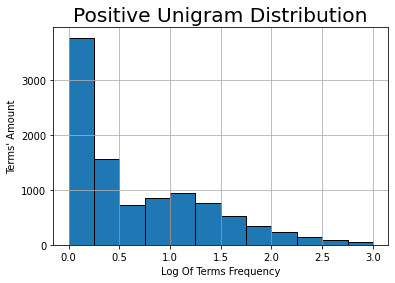

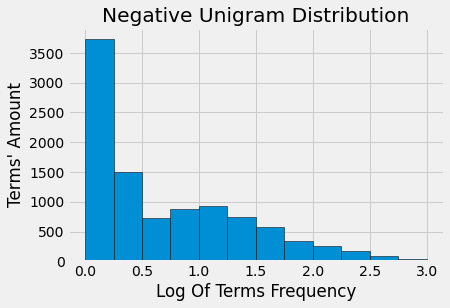

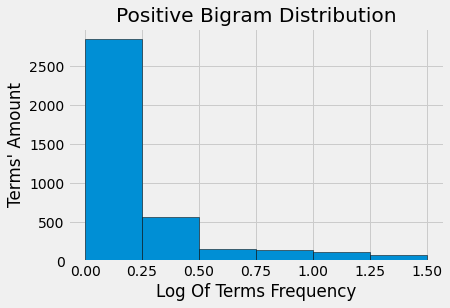

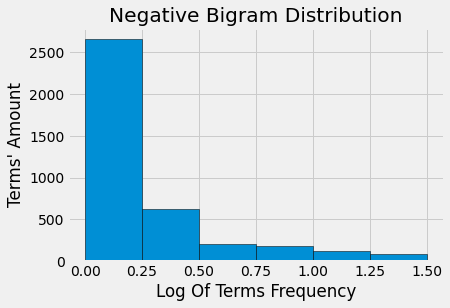

In [ ]:
hist_plot(unigram_positive_distribution, 'Positive Unigram Distribution', [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
hist_plot(unigram_negative_distribution, 'Negative Unigram Distribution', [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
hist_plot(bigram_positive_distribution, 'Positive Bigram Distribution', [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
hist_plot(bigram_negative_distribution, 'Negative Bigram Distribution', [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])

In [ ]:
# splitting into train and test
x = data['tweet']
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)

In [ ]:
# Benchmark classifiers
def benchmark(clf, vetcorizer, train_x):
    print('_' * 80)
    print("Training: ")
    print(clf)
    clf.fit(train_x, y_train)
    pred = clf.predict(vetcorizer.transform(x_test))
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf
    # return clf_descr, score

**Regular Model**

In [ ]:
# Tasks 2.a, 2.b and 2.d trainig model to predict the sentiment of the tweet
# Present train and test accuracy for the different models
print('****************************************count*************************************')
print('ngram_range: (1, 2)')
print('max_df=0.5')
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=0.5)
x_count_train = count_vectorizer.fit_transform(x_train)
name = 'LogisticRegression'
print('=' * 80)
print(name)
supervised_model = LogisticRegression(solver='liblinear', multi_class='ovr')
supervised_model = benchmark(supervised_model, count_vectorizer, x_count_train)

****************************************count*************************************
ngram_range: (1, 2)
max_df=0.5
LogisticRegression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy:   0.788
classification report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     14965
           4       0.78      0.81      0.79     14889

    accuracy                           0.79     29854
   macro avg       0.79      0.79      0.79     29854
weighted avg       0.79      0.79      0.79     29854

confusion matrix:
[[11525  3440]
 [ 2901 11988]]



**Deep Learning Model**

In [ ]:
# loading data
print('reading CSV')
data_path = "/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv"
csv = pd.read_csv(data_path, encoding='ISO-8859-1', header=None, 
                   skiprows=750000, usecols=[0, 5], names=['label', 'tweet'], nrows=100000)
csv = csv.drop_duplicates()
csv

reading CSV


,label,tweet
0,0,"@Opotopo small slip on Tryfan few weeks back, ..."
1,0,@Idristwilight You can post HAN when you want....
2,0,@rose_7 Ohh poor jan please tell her that if ...
3,0,Finally home from work...It was a looong day!!...
4,0,im very sad 4 chantelle and tom
...,...,...
99995,4,Now need 8 followers to compleate 1000 Follow...
99996,4,I knew I had to explain something to my friend...
99997,4,done tweeting..... til tomorrow..
99998,4,@cmozilo Act II set is pretty breath-taking -L...


In [ ]:
print('parsing CSV')

X, Y = [], []

for index, row in csv.iterrows():
    X.append(row['tweet'])
    y_part = row['label']
    if y_part == 0:
        yy = np.array([0])
    elif y_part == 4:
        yy = np.array([1])
    else:
        raise Exception('Invalid y_part value=' + y_part)
    Y.append(yy)

parsing CSV


In [ ]:
print('build words map')

max_features = 50000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)
X, Xt, Y, Yt = train_test_split(X, Y, test_size = 0.3, shuffle = True)

validation_size = 1500
X_validate = Xt[-validation_size:]
Y_validate = Yt[-validation_size:]
# print(X_validate)
# print(Y_validate)
Xt = Xt[:-validation_size]
Yt = Yt[:-validation_size]

maxlen = 0
def wrap_array(x, maxlen):
    for index in range(len(x)):
        xx = x[index]
        if len(xx) > maxlen:
            maxlen = len(xx)
        x[index] = np.array(xx)
    return np.array(x), maxlen

X, maxlen = wrap_array(X, maxlen)
Xt, maxlen = wrap_array(Xt, maxlen)
X_validate, maxlen = wrap_array(X_validate, maxlen)
Y, maxlen = wrap_array(Y, maxlen)
Yt, maxlen = wrap_array(Yt, maxlen)
Y_validate, maxlen = wrap_array(Y_validate, maxlen)

build words map


In [ ]:
# building deep learning model, train model and predict accuracy
print('build model')

batch_size = 256

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(124, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
print(model.summary())

print('Train...')
model.fit(X, Y, batch_size=batch_size, epochs=2, validation_data=(Xt, Yt), verbose=2)

score, acc = model.evaluate(X_validate, Y_validate, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

build model
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 41, 128)           6400000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 41, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 41, 32)            12320     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 124)               77872     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 125       
_________________________________________________________________
activation_14 (Activation)   (None, 1)   

In [ ]:
# Task 2.c trying the model of Assigment 2 without re-training to predict tweets sentiment

# define variables
data_path_two = "/content/drive/MyDrive/IMDB Dataset.csv"
data_two = pd.read_csv(data_path_two)
data_two = data_two.drop_duplicates()
data_two = data_two.replace(to_replace = 'positive', value = 1)
data_two = data_two.replace(to_replace = 'negative', value = 0)

# preprocessing step of the Assigment 2 model
stop_two = set(stopwords.words('english'))
stop_two.add('br')
stop_two.add('would')
stop_two.add('could')
exclude_two = set(string.punctuation)
lemma_two = WordNetLemmatizer()

# function which responsilbe on cleaninng and normalizing the text
# operating punctuating and stop words removal, and lemmatizaion
def clean_two(doc):
    punc_free = ''.join(ch for ch in doc if ch not in exclude_two)
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop_two])
    normalized = " ".join(lemma_two.lemmatize(word) for word in stop_free.split())
    return normalized

doc_clean_two = [clean_two(doc) for doc in data_two['review']]
data_two['review'] = doc_clean_two
# print(data_two)

# splitting data into train and test
x_two = data_two['review']
y_two = data_two['sentiment']
x_train_two, x_test_two, y_train_two, y_test_two = train_test_split(x_two, y_two, train_size=0.7, shuffle=True)

def benchmark_two(clf, vetcorizer, train_x_two):
    print('_' * 80)
    print("Training: ")
    clf.fit(train_x_two, y_train_two)
    pred = clf.predict(vetcorizer.transform(x_test_two))
    score = metrics.accuracy_score(y_test_two, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test_two, pred))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test_two, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score


# training old model with imdb dataset
print('****************************************IMDB Dataset*************************************')
print('Parameters: ')
print('max_df: ', 0.6)
print('ngram_range: (1, 2)')
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True, max_df=0.6)
x_tfidf_train = tfidf_vectorizer.fit_transform(x_train_two)
model_two = Perceptron(max_iter=50)
print('=' * 80)
print('Perceptron')
benchmark_two(model_two, tfidf_vectorizer, x_tfidf_train)


# reading current data
path = '/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(path, encoding='ISO-8859-1', header=None, 
                   skiprows=750000, usecols=[0, 5], names=['label', 'tweet'], nrows=100000)
data = data.drop_duplicates()
data = data.replace(to_replace = 4, value = 1)


# preprocessing
doc_clean = [clean_two(doc) for doc in data['tweet']]
data['tweet'] = doc_clean

# splitting into train and test
x = data['tweet']
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)

# x_tfidf_train = tfidf_vectorizer.fit_transform(x_train)
pred = model_two.predict(tfidf_vectorizer.transform(x_test))
score = metrics.accuracy_score(y_test, pred)
print('****************************************Twitter Dataset*************************************')
print("accuracy:   %0.3f" % score)
print("classification report:")
print(metrics.classification_report(y_test, pred))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))


****************************************IMDB Dataset*************************************
Parameters: 
max_df:  0.6
ngram_range: (1, 2)
Perceptron
________________________________________________________________________________
Training: 
accuracy:   0.895
classification report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7514
           1       0.89      0.89      0.89      7361

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875

confusion matrix:
[[6720  794]
 [ 773 6588]]

****************************************Twitter Dataset*************************************
accuracy:   0.577
classification report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     14844
           1       0.58      0.58      0.58     15010

    accuracy                           0.58     2

In [ ]:
!pip3 install tweepy

In [ ]:
#Q3.a
#Use Twitter streaming API to collect 15,000 tweets from Twitter about a specific topic, the topic we choose is a vaccine for covid19
import tweepy
from tweepy import OAuthHandler

ACCESS_TOKEN = '1356994275150602241-4nYDeVAyUPfFNX8hYCN50mXlqF3nNE'
ACCESS_TOKEN_SECRET = 'gdxhguffoRkmMUmbbaoPytQRXSisA54XAkvFjfsJmiGqi'
CONSUMER_KEY = 'CbJ8O0n8qhmd1p2yg5bAkKW3x'
CONSUMER_SECRET = 'WT7CW5BqqvFBKwqdNppj5pGuJbUeLX90P20LOjPNe71CYftotB'
auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [ ]:

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
  count =0
  def on_data(self, data):
      try:
            with open('vaccine.json', 'a') as f:
                f.write(data)
                return True
      except BaseException as e:
            print("Error on_data: %s" % str(e))
      return True
        
  
  def on_error(self, status):
        print(status)
        return True

In [ ]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [ ]:
myStream.filter(track=['vaccine','VACCINE','Vaccine'])


TweepError: ignored

In [ ]:
#extract the text from the json file
import json
fname = 'tweets.json'
# iterate the json file and extract the text part from the tweet
temp_list = list()
with open(fname, 'r',encoding="utf-8") as f:
  for line in f:
    if len(temp_list)<15000:
        if len(line) < 10:
            continue
        # tweet = json.loads(line)
        index_start = line.index('text') + 7
        index_end = line.index('source') -3
        text = line[index_start:index_end]
        if "display_text_range" in text:
           index = text.index('display_text_range')
           text = text[0:index]
        temp_list.append(text)

    else:
      break



15000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: generator 'ngrams' raised StopIteration


In [ ]:
#put the text values in dataframe, clean and pre process the texts and cteate unigram and bigram dataframes
import pandas as pd 
import json
from nltk.util import ngrams

#To load ready pd from csv file, reslease this lines from remark, and put in remark the next line
# data_vaccine = pd.DataFrame()
# data_vaccine = pd.read_csv('collected_tweets.csv')

data_vaccine['tweet'] = temp_list
data_vaccine = data_vaccine.drop_duplicates()
new_data = pd.DataFrame()
new_data_temp_list = list()

for data in data_vaccine['tweet']:
    if "display_text_range" in data:
          index = data.index('display_text_range')
          data = data[0:index]
    new_data_temp_list.append(data)

new_data['tweet'] = new_data_temp_list
doc_clean = [clean(doc) for doc in new_data['tweet']]
unigrams_doc_clean = [doc.split() for doc in doc_clean]
bigrams_doc_clean = [list(ngrams(doc, 2)) for doc in unigrams_doc_clean]
data_unigrams = pd.DataFrame()
data_bigrams = pd.DataFrame()
data_unigrams['tweet'] = unigrams_doc_clean
data_bigrams['tweet'] = bigrams_doc_clean



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: generator 'ngrams' raised StopIteration


In [ ]:
#building the dictionary
positive_dictionary = ['freedom','work','positive','release','healthy','strong','power','sport','power','smile', 'fun','funny' 'nice', 'great','heal','recover','recovery','happy', 'awesome', 'outstanding','impressive','new',
'fantastic', 'terrific', ':)', ':-)', 'like', 'love','cool','triumph', 'triumphal', 'triumphant', 'victory',':-)',':)',':o)'
":-}", ";-}", ":->",
    ";-)", "3>", "love", ":]", ":-]",'happy','healthy','fit','hale','wholesome','pay off','accept','excellent','life','free','save']


negative_dictionary = ['symptom','negative','yelled','awful','depression','lockdown','quarantine','distance','unemployment','worry','problem','unlikely','variant','resistant','Fired','snub','poor','dislike','evil','worst','nightmare','tired','mutation', 'infectious','contagious','hospitalized','insulation','sick','contagious','bad', 'terrible', 'crap','worst','cry','death','dead','dying','die','disease','epidemic' 'useless', 'hate', ':(', ':-(','defeat','sad',':-(',':(','|-{',';-(',';-<"',':-|']
#adding emoji and emoticons
emoji_data = pd.read_csv('ijstable.csv', encoding='ISO-8859-1', header=None, 
                skiprows=2,usecols=[2, 8], names=['Unicode', 'Sentiment score'])
emoji_data_fix_list = list()
for emoji in emoji_data['Unicode']:
  fix_emoji = emoji.replace('0x','u') 
  emoji_data_fix_list.append(fix_emoji)

emoji_data['Unicode'] = emoji_data_fix_list
for emoji_score,emoji_unicode in zip(emoji_data['Sentiment score'],emoji_data['Unicode']):
  if emoji_score>0:
    positive_dictionary.append(emoji_unicode)
  elif emoji_score<0:
    negative_dictionary.append(emoji_unicode)


In [ ]:
# iterate all twitts and choose sentiment for them
choosen_sentiment = list()
count_twitts = 0
for tweet in data_unigrams['tweet']:
    count_twitts = count_twitts +1
    count_pos = 0
    count_neg = 0
    for word in tweet:
      if word in positive_dictionary:
        count_pos = count_pos +1
      elif word in negative_dictionary:
        count_neg = count_neg +1
    if count_pos> count_neg:
      choosen_sentiment.append("positive")
    elif count_neg> count_pos:
       choosen_sentiment.append("negative")
    else:
       choosen_sentiment.append("neutral")

  
data_unigrams['label'] = choosen_sentiment
new_data['label'] = choosen_sentiment
data_bigrams['label'] = choosen_sentiment
# new_data.to_excel('data_fix.xlsx', index = False, header=True)




In [ ]:
import itertools
import operator

table_vaccine = pd.DataFrame()

# table which present the top 10 terms per category 
vaccine_positive_unigram_reviews = data_unigrams[data_unigrams['label'] == "positive"]['tweet']
vaccine_positive_bigram_reviews = data_bigrams[data_bigrams['label'] == "positive"]['tweet']
vaccine_negative_unigram_reviews = data_unigrams[data_unigrams['label'] == "negative"]['tweet']
vaccine_negative_bigram_reviews = data_bigrams[data_bigrams['label'] == "negative"]['tweet']


vaccine_bigram_positive_term_amount, vaccine_bigram_positive_distribution, vaccine_dic_bigram_positive = distribution_terms_category(vaccine_positive_bigram_reviews, 4000)
vaccine_bigram_negative_term_amount, vaccine_bigram_negative_distribution, vaccine_dic_bigram_negative = distribution_terms_category(vaccine_negative_bigram_reviews, 4000)
vaccine_unigram_positive_term_amount, vaccine_unigram_positive_distribution, vaccine_dic_unigram_positive = distribution_terms_category(vaccine_positive_unigram_reviews, 10000)
vaccine_unigram_negative_term_amount, vaccine_unigram_negative_distribution, vaccine_dic_unigram_negative = distribution_terms_category(vaccine_negative_unigram_reviews, 10000)
table = pd.DataFrame()
table_vaccine['positive unigram'] = vaccine_unigram_positive_term_amount
table_vaccine['negative unigram'] = vaccine_unigram_negative_term_amount
table_vaccine['positive bigram'] = vaccine_bigram_positive_term_amount
table_vaccine['negative bigram'] = vaccine_bigram_negative_term_amount
table_vaccine

,positive unigram,negative unigram,positive bigram,negative bigram
0,vaccine,vaccine,"(covid, 19)","(covid, 19)"
1,like,death,"(19, vaccine)","(covid, vaccine)"
2,new,covid,"(covid, vaccine)","(19, vaccine)"
3,covid,people,"(get, vaccine)","(get, vaccine)"
4,work,variant,"(vaccine, work)","(covid, 19,)"
5,get,get,"(#covid19, vaccine)","(vaccine, rollout)"
6,great,problem,"(new, york)","(covid, death)"
7,19,lockdown,"(look, like)","(death, elderly)"
8,life,bad,"(vaccine, like)","(vaccine, death)"
9,people,19,"(great, news)","(elderly, recovered)"


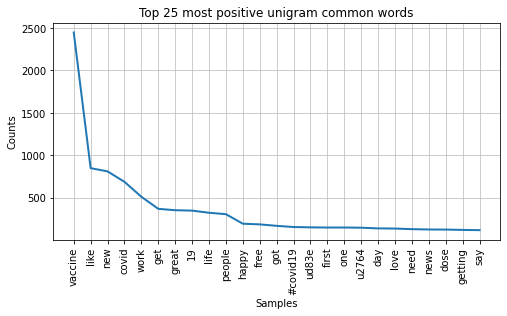

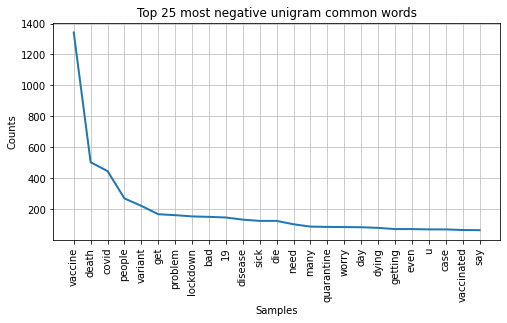

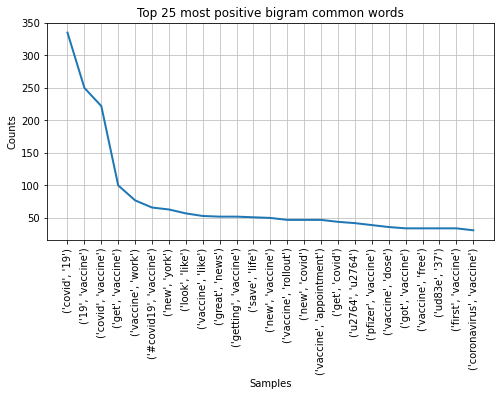

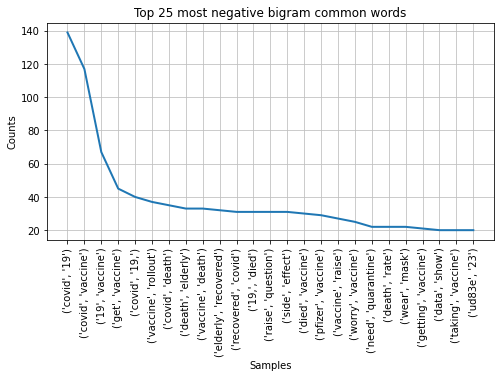

In [ ]:
import matplotlib.pyplot as plt
plot_graph('positive', 'unigram', vaccine_dic_unigram_positive)
plot_graph('negative', 'unigram', vaccine_dic_unigram_negative)
plot_graph('positive', 'bigram', vaccine_dic_bigram_positive)
plot_graph('negative', 'bigram', vaccine_dic_bigram_negative)

In [ ]:
# Task 4.a 
collected_tweets_path = "/content/drive/MyDrive/collected_tweets.csv"
data_collected_tweets = pd.read_csv(collected_tweets_path)
data_collected_tweets = data_collected_tweets.drop_duplicates()
data_collected_tweets = data_collected_tweets.replace(to_replace = 'positive', value = 4)
data_collected_tweets = data_collected_tweets.replace(to_replace = 'negative', value = 0)
# remove neutral
data_collected_tweets = data_collected_tweets.drop(data_collected_tweets[data_collected_tweets.label == 'neutral'].index)
data_collected_tweets.to_csv('/content/drive/MyDrive/after_cleaning.csv')

In [ ]:
csv_path = "/content/drive/MyDrive/after_cleaning.csv"
csv = pd.read_csv(csv_path)
clean = [clean(doc) for doc in csv['tweet']]
csv['tweet'] = clean

In [ ]:
# Task 4.b
# splitting into train and test
x = csv['tweet']
y = csv['label']
x_test = x
y_test = y

# predict model accuracy
pred = supervised_model.predict(count_vectorizer.transform(x_test))
#x_count_train = count_vectorizer.fit_transform(x_train)
score = metrics.accuracy_score(y_test, pred)
print('****************************************Machine Learning Model*************************************')
print("accuracy:   %0.3f" % score)
print("classification report:")
print(metrics.classification_report(y_test, pred))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))

****************************************Machine Learning Model*************************************
accuracy:   0.677
classification report:
              precision    recall  f1-score   support

           0       0.54      0.68      0.60      2266
           4       0.79      0.68      0.73      4081

    accuracy                           0.68      6347
   macro avg       0.66      0.68      0.66      6347
weighted avg       0.70      0.68      0.68      6347

confusion matrix:
[[1537  729]
 [1323 2758]]


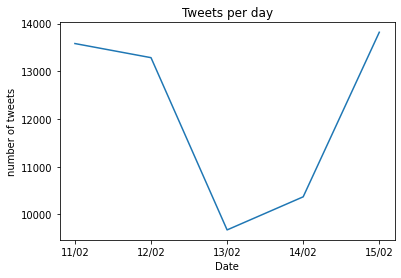

In [ ]:
#5.1
import pandas as pd
import matplotlib.pyplot as plt 
day1_data =  pd.read_csv('/content/drive/MyDrive/tweets1102.csv')
day2_data =  pd.read_csv('/content/drive/MyDrive/tweets1202.csv')
day3_data =  pd.read_csv('/content/drive/MyDrive/tweets1302.csv')
day4_data =  pd.read_csv('/content/drive/MyDrive/tweets1402.csv')
day5_data =  pd.read_csv('/content/drive/MyDrive/tweets1502.csv')

num_of_tweets_day1 = len(day1_data)
num_of_tweets_day2 = len(day2_data)
num_of_tweets_day3 = len(day3_data)
num_of_tweets_day4 = len(day4_data)
num_of_tweets_day5 = len(day5_data)

x = ['11/02','12/02','13/02','14/02','15/02']
y_a=[num_of_tweets_day1,num_of_tweets_day2,num_of_tweets_day3,num_of_tweets_day4,num_of_tweets_day5]


# plotting the points  
plt.plot(x, y_a) 
# naming the x axis 
plt.xlabel('Date') 
# naming the y axis 
plt.ylabel('number of tweets') 
plt.title('Tweets per day') 
  
# function to show the plot 
plt.show() 

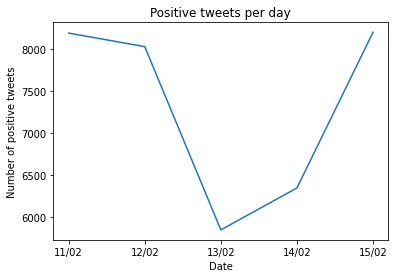

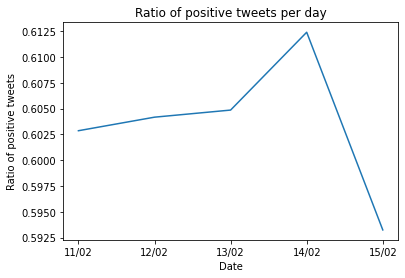

In [ ]:
#5.2

#need to take the data from what matan will do in 4. need to send each twitts data to his model.
num_of_pos_tweets_day1 = calculate_positive_sentiment(day1_data)
num_of_pos_tweets_day2 = calculate_positive_sentiment(day2_data)
num_of_pos_tweets_day3 = calculate_positive_sentiment(day3_data)
num_of_pos_tweets_day4 = calculate_positive_sentiment(day4_data)
num_of_pos_tweets_day5 = calculate_positive_sentiment(day5_data)



x = ['11/02','12/02','13/02','14/02','15/02']
y_b=[num_of_pos_tweets_day1,num_of_pos_tweets_day2,num_of_pos_tweets_day3,num_of_pos_tweets_day4,num_of_pos_tweets_day5]

# plotting the points  
plt.plot(x, y_b) 
# naming the x axis 
plt.xlabel('Date') 
# naming the y axis 
plt.ylabel('Number of positive tweets') 
plt.title('Positive tweets per day') 
# function to show the plot 
plt.show() 

ratio_positive_day1 = num_of_pos_tweets_day1/num_of_tweets_day1
ratio_positive_day2 = num_of_pos_tweets_day2/num_of_tweets_day2
ratio_positive_day3 = num_of_pos_tweets_day3/num_of_tweets_day3
ratio_positive_day4 = num_of_pos_tweets_day4/num_of_tweets_day4
ratio_positive_day5 = num_of_pos_tweets_day5/num_of_tweets_day5

y_b_ratio = [ratio_positive_day1,ratio_positive_day2,ratio_positive_day3,ratio_positive_day4,ratio_positive_day5]
plt.plot(x, y_b_ratio) 
plt.xlabel('Date') 
plt.ylabel('Ratio of positive tweets') 
plt.title('Ratio of positive tweets per day') 
plt.show() 


In [ ]:
def calculate_positive_sentiment(df):
  count_positive = 0
  for sentiment in df['label']:
     if sentiment ==4:
        count_positive = count_positive+1
  return count_positive


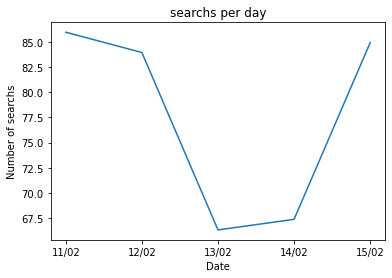

In [ ]:
#5.3
#present a graph of google trends serch value and the days that taken.
import pandas as pd
import matplotlib.pyplot as plt 
x = ['11/02','12/02','13/02','14/02','15/02']


y_c=[85.95,83.94,66.33,67.38,84.91]#the values are avarage of the values between 18:00-20:00 and taken from google trends


# plotting the points  
plt.plot(x, y_c) 
# naming the x axis 
plt.xlabel('Date') 
# naming the y axis 
plt.ylabel('Number of searchs') 
plt.title('searchs per day') 
# function to show the plot 

plt.show() 



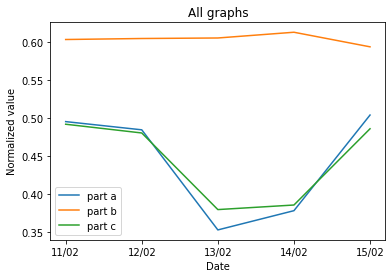

In [ ]:
#5.4 check with pearson correlation which times series are more correlated
from sklearn import preprocessing
import scipy.stats
import numpy as np

#normalize the data
data_5_a_normal_list = list()
data_5_b_normal_list = list()
data_5_c_normal_list = list()

x_array_a = np.array(y_a)
data_5_a_normal = preprocessing.normalize([x_array_a])
for data in data_5_a_normal[0]:
  data_5_a_normal_list.append(data)




data_5_b_normal_list = y_b_ratio

x_array_c = np.array(y_c)
data_5_c_normal = preprocessing.normalize([x_array_c])
for data in data_5_c_normal[0]:
  data_5_c_normal_list.append(data)


# plotting the points  
plt.plot(x, data_5_a_normal_list )
plt.plot(x, data_5_b_normal_list )
plt.plot(x, data_5_c_normal_list )

# naming the x axis 
plt.xlabel('Date') 
# naming the y axis 
plt.ylabel('Normalized value') 
plt.title('All graphs') 
plt.legend(["part a","part b", "part c"])

# function to show the plot 

plt.show() 



ra_c, pa_c = scipy.stats.pearsonr(data_5_a_normal_list, data_5_c_normal_list)
ra_c

ra_b, pa_b = scipy.stats.pearsonr(data_5_a_normal_list, data_5_b_normal_list)


rb_c, pb_c = scipy.stats.pearsonr(data_5_b_normal_list, data_5_c_normal_list)




In [ ]:
print('pearson correlation between a and c: {}'.format( ra_c))
print('pearson correlation between a and b: {}'.format( ra_b))
print('pearson correlation between b and c: {}'.format( rb_c))


pearson correlation between a and c: 0.9926360160635862
pearson correlation between a and b: -0.6792242304477168
pearson correlation between b and c: -0.6709865246298752
